## Largest Rectangle In Histogram
#### Difficulty: Hard

Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.

<strong>Example 1:</strong>
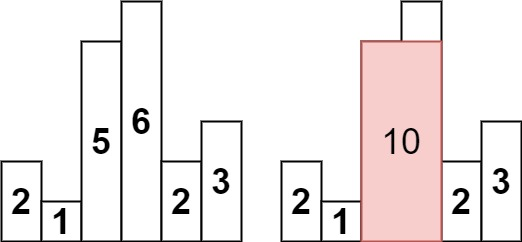

- Input: `heights = [2,1,5,6,2,3]`
- Output: `10`

Explanation: 
- The above is a histogram where width of each bar is 1.
- The largest rectangle is shown in the red area, which has an area = 10 units.

<br/>
<hr/>
<br/>

<strong>Example 2:</strong>
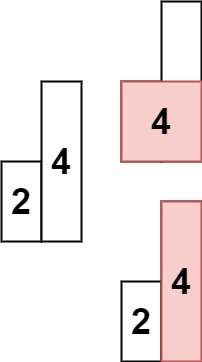

- Input: `heights = [2,4]`
- Output: `4`
 
Constraints:
- 1 <= `heights.length` <= 105
- 0 <= `heights[i]` <= 104

Link to problem: https://leetcode.com/problems/car-fleet/description/

In [ ]:
# Solution 1: Another implementation of monotonic stacks
# This version tracks indices in increasing order. This ensured it was easy to track width
# Solved the problem but the solution performs with a slightly suboptimal runtime

class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        # Init max_area, and length of heigths
        max_area = 0
        stack = []

        for i, h in enumerate(heights):
            # Starting index
            start = i

            # If new bar height is shorter than previous
            while stack and stack[-1][1] > h:
                # Pop to previous taller bar
                index, height = stack.pop()
                
                # Calculate area of bar being popped
                max_area = max(max_area, height * (i-index))

                # Ensure to update index to include all previous bars of equal or greater height.
                # To track the width
                start = index

            # Correct order - insert height & starting index
            stack.append([start ,h])

        # Find area for remaining potential solutions, update max_area if necessary
        for i, h in stack:
            max_area = max(max_area, h*(len(heights) - i))


        return max_area

Results:

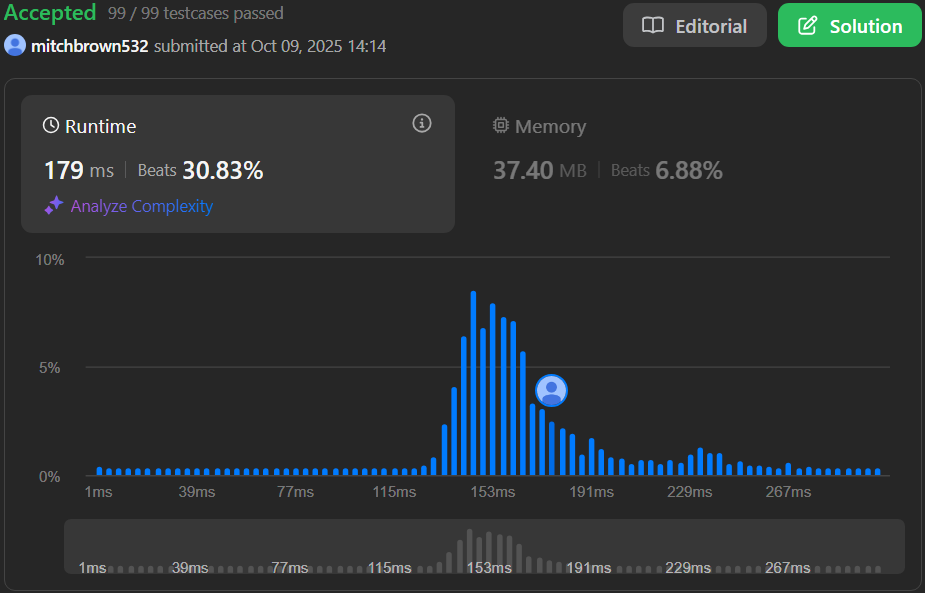

In [ ]:
# Solution 2: Very similar logic to solution above - includes optimizations to improve runtime.
    # Ending the array with 0 flushes the stack - all remaining rectangles will be calculated (without the extra loop)
    # Using >= ensures that duplicate heights are immediately popped
    # Just storing indicies rather than index+height pair
    # Previous solution had len() running inside of a loop - this means many extra calculations. 
# New solution has a far superior runtime and memory performance

class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        # Init max_area, and length of heigths
        max_area = 0
        stack = []
        H = heights
        
        # Using sentinel 0 flushes the stack
        for i, h in enumerate(heights +[0]): 

            # If new bar height is shorter than previous
            while stack and H[stack[-1]] >= h:
                # Pop to previous taller bar, update curr height
                index = stack.pop()
                height = H[index]
                
                left = stack[-1] if stack else -1 # previous smaller bar
                width = i - left - 1 # right = i

                # Update max height if necessary
                if height*width > max_area:
                    max_area = height*width
                

                
            # Correct order ensured - insert index
            stack.append(i)

        return max_area

Results:

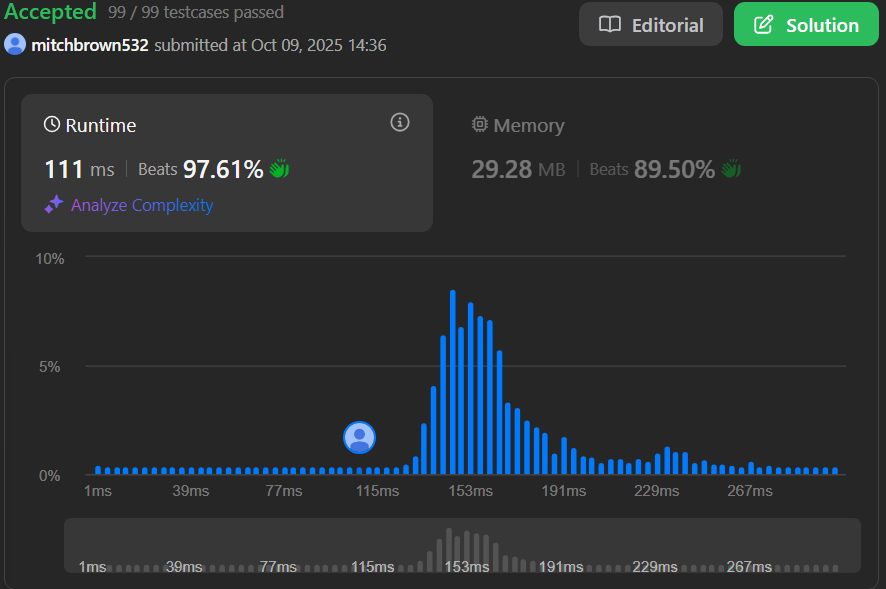